# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from PhyNum import *

## Initialisations

In [2]:
u = np.array([0, 0, -1])  # direction de la lumière

theta = 0

Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
                [0, 1, 0],
                [-np.sin(theta), 0, np.cos(theta)]])

u = Ry @ u



# Déplacement nécessaire des rayons en fonction de leur angle d'incidence (mesuré entre u et ux)
dux = (Lz-h)*np.tan(theta) * np.array([1, 0, 0])

rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append((np.array([(i-Nx/2+1/2)*dx, ((j-Ny/2)+1/2)*dy, h+0.1]) + dux, u))


### Surface initiale

In [3]:


# Définition d'une surface d'eau
surface = h + a*np.sin(Kx*(grille_X-Lx/2)) * np.sin(Ky*(grille_Y-Ly/2))
surface1 = h + a*np.sin(Kx*(grille_X-Lx/2)) * np.sin(Ky*(grille_Y-Ly/2)) * np.cos(omega(Kx, Ky)*dt)



h0 = np.zeros((Nx, Ny), dtype=complex)
integrande = np.zeros((Nx, Ny), dtype=complex)
A = np.zeros((Nx, Ny), dtype=complex)
B = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = (i-Nx/2)*dkx
        ky = (j-Ny/2)*dky
        h0[i, j] = random_h0(kx, ky, Ph_Phillips, np.array([1, 0]))

        A[i, j] = h0[i, j]
        B[i, j] = np.conjugate(h0[-i, -j])
        integrande[i, j] = (A[i, j] + B[i, j])*Nx*Ny

surface[:,:] = fact_1[:,:]*np.real(np.fft.ifft2(integrande))+h



## Calculs

In [4]:
trajectoires = calcul_trajectoires(rayons, surface, A, B,  0)


Calcul des trajectoires : 100%|██████████| 31/31 [00:00<00:00, 99.68it/s]


In [5]:
motif = calcul_motifs(trajectoires)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave("caustiques Nx=" + str(Nx) + ".png", image)


## Affichage

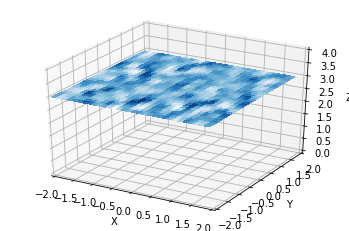

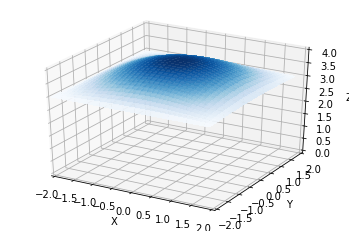

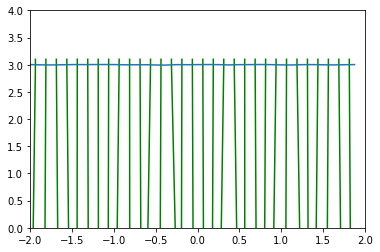

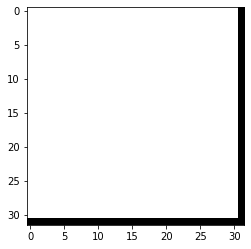

In [6]:
plot_surface(surface)
plt.show()

plot_surface(surface1)
plt.show()



affiche_rayons(trajectoires, surface, save=True)
plt.show()


plt.imshow(motif, cmap='gray')
plt.show()


In [7]:
TF_surface = np.fft.fft2(surface-h)
TF_surface1 = np.fft.fft2(surface1-h)

# A = np.zeros((Nx, Ny), dtype=complex)
# B = np.zeros((Nx, Ny), dtype=complex)


# for i in range(0, Nx):
#    for j in range(0, Ny):
#       A[i, j] = (-TF_surface1[i, j] + TF_surface[i, j] *
#            np.exp(1j*OMEGA[i, j]*dt))/(2j*np.sin(OMEGA[i, j]*dt))

#       B[i, j] = (TF_surface1[i, j] - TF_surface[i, j] *
#            np.exp(-1j*OMEGA[i, j]*dt))/(2j*np.sin(OMEGA[i, j]*dt))


genere_animation_simple(surface, h0, rayons, save_motif=True)


frame: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]


In [8]:

images = [Image.open(f"Frames/frame{n}.png") for n in range(frames)]

images[0].save('wave Nx='+ str(Nx) + '.gif', save_all=True,
                append_images=images[1:], duration=dt*10**3, loop=0)
    
images = [Image.open(f"Frames/frame {n} image.png") for n in range(frames)]

images[0].save('caustiques dynamique Nx=' + str(Nx) + '.gif', save_all=True,
                   append_images=images[1:], duration=dt*10**3, loop=0)
